In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import xlwt
import numpy as np
import openpyxl

In [14]:
# 1. 读取数据
# feed侧数据
for i in range(5,105,5):
    treatment_ratio=i/100
    locals()[f"outputs_feed_{i}"]= pd.read_excel(f"outputs_feed_{treatment_ratio}.xls")
print(outputs_feed_5)

# outputs_feed_100 = pd.read_excel("outputs_feed_1.xls")
# print(outputs_feed_100)

# user侧数据
for i in range(5,105,5):
    treatment_ratio=i/100
    locals()[f"outputs_user_{i}"]= pd.read_excel(f"outputs_user_{treatment_ratio}.xls")
print(outputs_user_5)

# outputs_user_100 = pd.read_excel("outputs_user_1.xls")
# print(outputs_user_100)

  Unnamed: 0  t_all_feed(所有user)  t_average(/总feed数1000)  t_new_feed(所有user)  \
0        曝光数         50000.00000               30.599755         5053.000000   
1        点击数          5863.00000                3.588127          311.000000   
2     点击率ctr             0.11726                0.117260            0.061548   

   t_average(/new_feed数300)  c_all_feed(所有user)  c_average(/总feed数1000)  \
0                265.947368          50000.0000               30.599755   
1                 16.368421           6115.0000                3.057500   
2                  0.061548              0.1223                0.099919   

   c_new_feed(所有user)  c_average(/new feed数300)         ATE  p_value  
0         2562.000000                134.842105  131.105263  0.06970  
1          270.000000                 14.210526    2.157895  0.40695  
2            0.105386                  0.105386   -0.043839  0.00840  
  Unnamed: 0  t_all_user(所有feed)  average1(/总user数100000)  \
0        曝光数         50000.00000 

feed 侧分析

In [15]:
 # 2. 创建feed 侧变量
data= pd.DataFrame()
index=[f"{i}%" for i in range(5,105,5)]
print(index)
col=["ratio","impression_t","impression_c","impression_ATE","impression_p","clicks_t","clicks_c","clicks_ATE","clicks_p","ctr_t","ctr_c",
   "ctr_ATE","ctr_p"]

['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%', '100%']


In [16]:
for i in range(len(index)):
    print(5*(i+1))
    data.loc[index[i],col[0]]= 5*(i+1)
    data.loc[index[i],col[1]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[0,locals()[f"outputs_feed_{5*(i+1)}"].columns[4]]
    # print(data.loc[index[i],col[1]])
    data.loc[index[i],col[2]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[0,locals()[f"outputs_feed_{5*(i+1)}"].columns[8]]
    # print(data.loc[index[i],col[2]])
    data.loc[index[i],col[3]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[0,locals()[f"outputs_feed_{5*(i+1)}"].columns[9]]    # ATE
    data.loc[index[i],col[4]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[0,locals()[f"outputs_feed_{5*(i+1)}"].columns[10]]   # P
    data.loc[index[i],col[5]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[1,locals()[f"outputs_feed_{5*(i+1)}"].columns[4]]
    data.loc[index[i],col[6]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[1,locals()[f"outputs_feed_{5*(i+1)}"].columns[8]]
    data.loc[index[i],col[7]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[1,locals()[f"outputs_feed_{5*(i+1)}"].columns[9]]
    data.loc[index[i],col[8]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[1,locals()[f"outputs_feed_{5*(i+1)}"].columns[10]]
    data.loc[index[i],col[9]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[2,locals()[f"outputs_feed_{5*(i+1)}"].columns[4]]
    data.loc[index[i],col[10]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[2,locals()[f"outputs_feed_{5*(i+1)}"].columns[8]]
    data.loc[index[i],col[11]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[2,locals()[f"outputs_feed_{5*(i+1)}"].columns[9]]
    data.loc[index[i],col[12]]= locals()[f"outputs_feed_{5*(i+1)}"].loc[2,locals()[f"outputs_feed_{5*(i+1)}"].columns[10]]

print(data)
# 保存均值数据
data.to_excel("feed.xls")

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
      ratio  impression_t  impression_c  impression_ATE  impression_p  \
5%      5.0    265.947368    134.842105      131.105263       0.06970   
10%    10.0    305.789474    180.105263      125.684211       0.09840   
15%    15.0    389.578947    262.228070      127.350877       0.11080   
20%    20.0    486.584416    365.376623      121.207792       0.18140   
25%    25.0    499.572917    379.104167      120.468750       0.19365   
30%    30.0    534.052174    405.973913      128.078261       0.17780   
35%    35.0    587.261194    457.641791      129.619403       0.19560   
40%    40.0    672.883117    539.967532      132.915584       0.20245   
45%    45.0    751.445087    627.930636      123.514451       0.23120   
50%    50.0    756.187500    634.083333      122.104167       0.23195   
55%    55.0    784.962085    662.123223      122.838863       0.23570   
60%    60.0    889.147186    764.194805      124.952381       0.

C:\Users\qinluhu\AppData\Local\Temp\ipykernel_168\2088585122.py:21: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel("feed.xls")


      ratio  impression_t  impression_c  impression_ATE  impression_p  \
5%      5.0    265.947368    134.842105      131.105263       0.06970   
10%    10.0    305.789474    180.105263      125.684211       0.09840   
15%    15.0    389.578947    262.228070      127.350877       0.11080   
20%    20.0    486.584416    365.376623      121.207792       0.18140   
25%    25.0    499.572917    379.104167      120.468750       0.19365   
30%    30.0    534.052174    405.973913      128.078261       0.17780   
35%    35.0    587.261194    457.641791      129.619403       0.19560   
40%    40.0    672.883117    539.967532      132.915584       0.20245   
45%    45.0    751.445087    627.930636      123.514451       0.23120   
50%    50.0    756.187500    634.083333      122.104167       0.23195   
55%    55.0    784.962085    662.123223      122.838863       0.23570   
60%    60.0    889.147186    764.194805      124.952381       0.27590   
65%    65.0    949.132000    832.440000      116.69

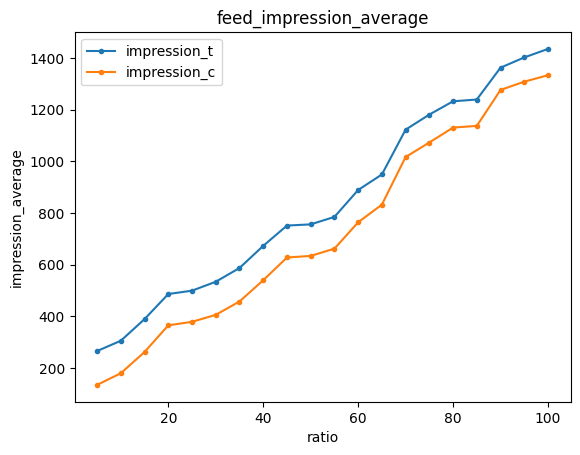

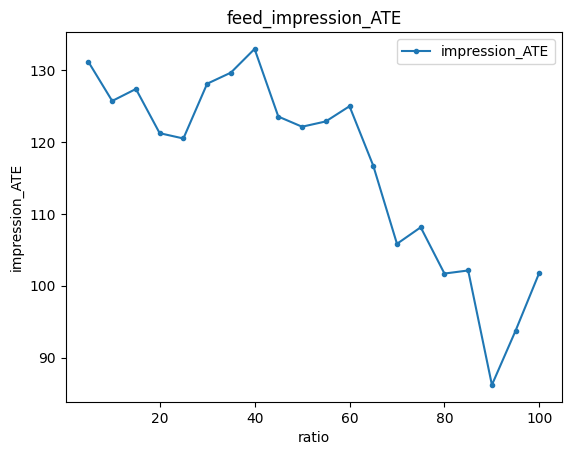

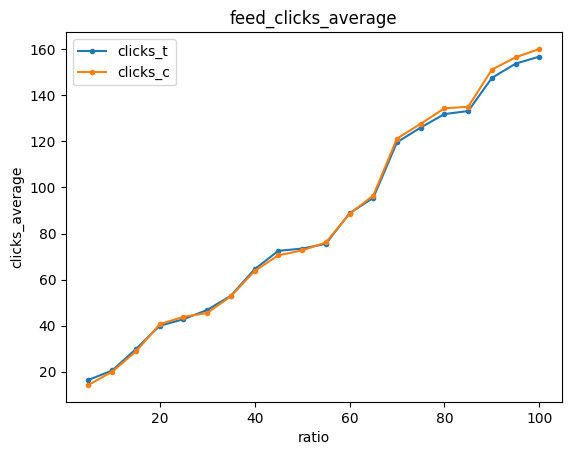

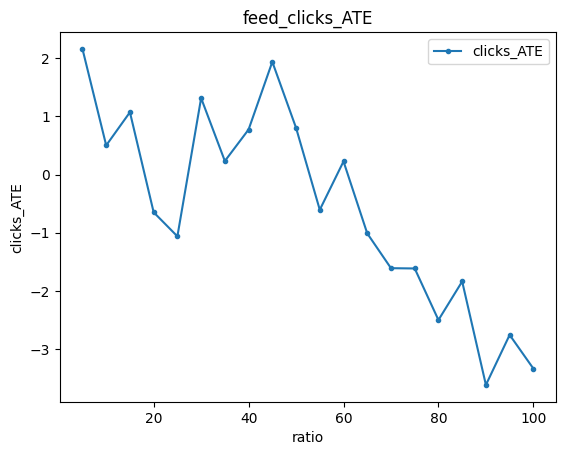

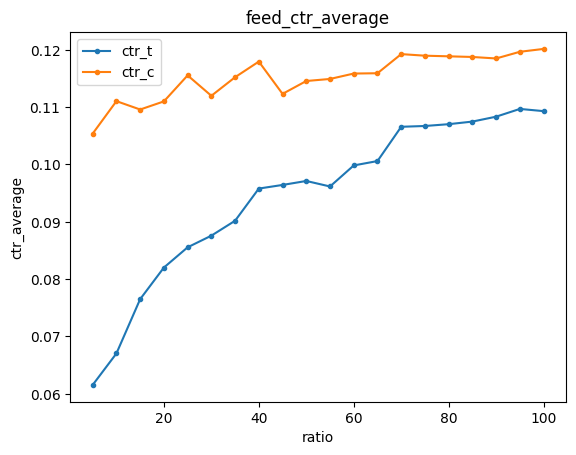

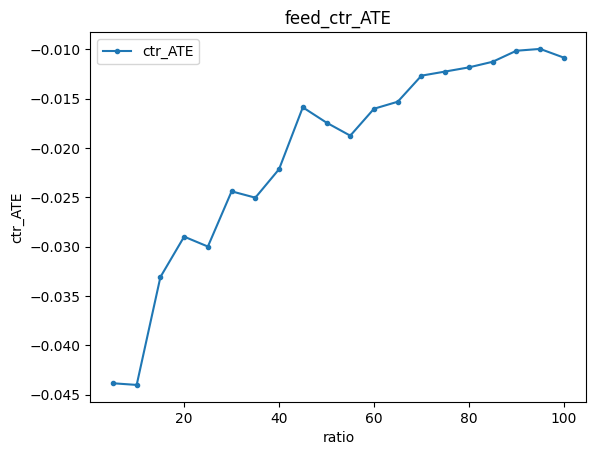

In [17]:
# 3. feed 侧画图分析
data=data.sort_values(by="ratio")
print(data)
# (1)impression
data.plot.line(x="ratio",y=["impression_t","impression_c"],marker=".")
plt.xlabel("ratio")
plt.ylabel("impression_average")
plt.title("feed_impression_average")
plt.savefig("feed_impression_average.png")
plt.show()
# impression ATE
data.plot.line(x="ratio",y="impression_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("impression_ATE")
plt.title("feed_impression_ATE")
plt.savefig("feed_impression_ATE.png")
plt.show()
# (2)clicks
data.plot.line(x="ratio",y=["clicks_t","clicks_c"],marker=".")
plt.xlabel("ratio")
plt.ylabel("clicks_average")
plt.title("feed_clicks_average")
plt.savefig("feed_clicks_average.png")
plt.show()
#ATE
data.plot.line(x="ratio",y="clicks_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("clicks_ATE")
plt.title("feed_clicks_ATE")
plt.savefig("feed_clicks_ATE.png")
plt.show()
# 3. 点击率ctr
data.plot.line(x="ratio",y=["ctr_t","ctr_c"],marker=".")
plt.xlabel("ratio")
plt.ylabel("ctr_average")
plt.title("feed_ctr_average")
plt.savefig("feed_ctr_average.png")
plt.show()
# ATE
data.plot.line(x="ratio",y="ctr_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("ctr_ATE")
plt.title("feed_ctr_ATE")
plt.savefig("feed_ctr_ATE.png")
plt.show()

user 侧分析

In [18]:
# 2. 创建user 侧变量
data1= pd.DataFrame()
index=[f"{i}%" for i in range(5,105,5)]
print(index)
col=["ratio","impression_t","impression_c","impression_ATE","impression_p","clicks_t","clicks_c","clicks_ATE","clicks_p","ctr_t","ctr_c",
   "ctr_ATE","ctr_p"]

['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%', '100%']


In [19]:
for i in range(len(index)):
    print(5*(i+1))
    data1.loc[index[i],col[0]]= 5*(i+1)
    data1.loc[index[i],col[1]]= locals()[f"outputs_user_{5*(i+1)}"].loc[0,locals()[f"outputs_user_{5*(i+1)}"].columns[4]]
    # print(data1.loc[index[i],col[1]])
    data1.loc[index[i],col[2]]= locals()[f"outputs_user_{5*(i+1)}"].loc[0,locals()[f"outputs_user_{5*(i+1)}"].columns[8]]
    # print(data1.loc[index[i],col[2]])
    data1.loc[index[i],col[3]]= locals()[f"outputs_user_{5*(i+1)}"].loc[0,locals()[f"outputs_user_{5*(i+1)}"].columns[9]]    # ATE
    data1.loc[index[i],col[4]]= locals()[f"outputs_user_{5*(i+1)}"].loc[0,locals()[f"outputs_user_{5*(i+1)}"].columns[10]]   # P
    data1.loc[index[i],col[5]]= locals()[f"outputs_user_{5*(i+1)}"].loc[1,locals()[f"outputs_user_{5*(i+1)}"].columns[4]]
    data1.loc[index[i],col[6]]= locals()[f"outputs_user_{5*(i+1)}"].loc[1,locals()[f"outputs_user_{5*(i+1)}"].columns[8]]
    data1.loc[index[i],col[7]]= locals()[f"outputs_user_{5*(i+1)}"].loc[1,locals()[f"outputs_user_{5*(i+1)}"].columns[9]]
    data1.loc[index[i],col[8]]= locals()[f"outputs_user_{5*(i+1)}"].loc[1,locals()[f"outputs_user_{5*(i+1)}"].columns[10]]
    data1.loc[index[i],col[9]]= locals()[f"outputs_user_{5*(i+1)}"].loc[2,locals()[f"outputs_user_{5*(i+1)}"].columns[4]]
    data1.loc[index[i],col[10]]= locals()[f"outputs_user_{5*(i+1)}"].loc[2,locals()[f"outputs_user_{5*(i+1)}"].columns[8]]
    data1.loc[index[i],col[11]]= locals()[f"outputs_user_{5*(i+1)}"].loc[2,locals()[f"outputs_user_{5*(i+1)}"].columns[9]]
    data1.loc[index[i],col[12]]= locals()[f"outputs_user_{5*(i+1)}"].loc[2,locals()[f"outputs_user_{5*(i+1)}"].columns[10]]

print(data1)
# 保存均值数据
data1.to_excel("user.xls")

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
      ratio  impression_t  impression_c  impression_ATE  impression_p  \
5%      5.0      1.010600      0.512400        0.498200           0.0   
10%    10.0      1.162000      0.684400        0.477600           0.0   
15%    15.0      1.480400      0.996467        0.483933           0.0   
20%    20.0      1.873350      1.406700        0.466650           0.0   
25%    25.0      1.918360      1.455760        0.462600           0.0   
30%    30.0      2.047200      1.556233        0.490967           0.0   
35%    35.0      2.248371      1.752114        0.496257           0.0   
40%    40.0      2.590600      2.078875        0.511725           0.0   
45%    45.0      2.888889      2.414044        0.474844           0.0   
50%    50.0      2.903760      2.434880        0.468880           0.0   
55%    55.0      3.011400      2.540145        0.471255           0.0   
60%    60.0      3.423217      2.942150        0.481067         

C:\Users\qinluhu\AppData\Local\Temp\ipykernel_168\2835648119.py:21: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data1.to_excel("user.xls")


      ratio  impression_t  impression_c  impression_ATE  impression_p  \
5%      5.0      1.010600      0.512400        0.498200           0.0   
10%    10.0      1.162000      0.684400        0.477600           0.0   
15%    15.0      1.480400      0.996467        0.483933           0.0   
20%    20.0      1.873350      1.406700        0.466650           0.0   
25%    25.0      1.918360      1.455760        0.462600           0.0   
30%    30.0      2.047200      1.556233        0.490967           0.0   
35%    35.0      2.248371      1.752114        0.496257           0.0   
40%    40.0      2.590600      2.078875        0.511725           0.0   
45%    45.0      2.888889      2.414044        0.474844           0.0   
50%    50.0      2.903760      2.434880        0.468880           0.0   
55%    55.0      3.011400      2.540145        0.471255           0.0   
60%    60.0      3.423217      2.942150        0.481067           0.0   
65%    65.0      3.650508      3.201692        0.44

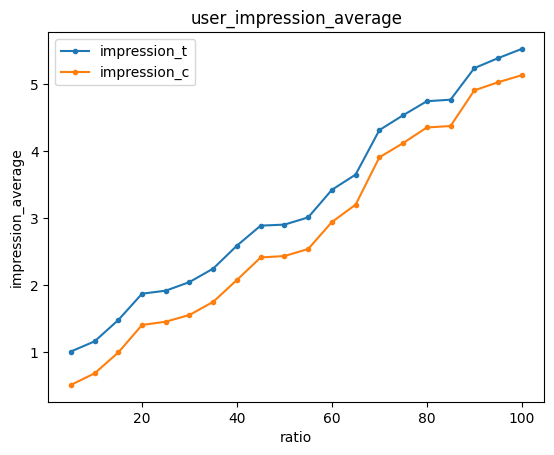

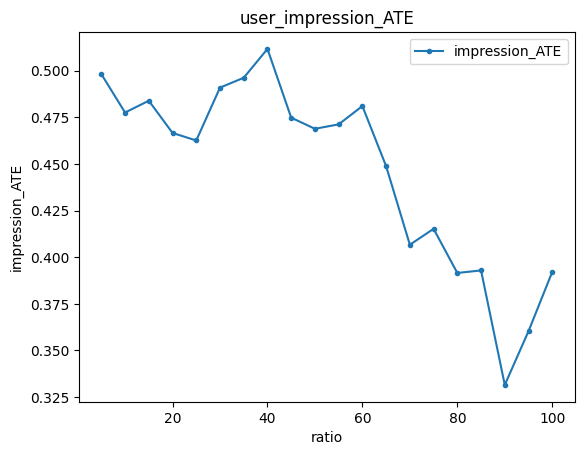

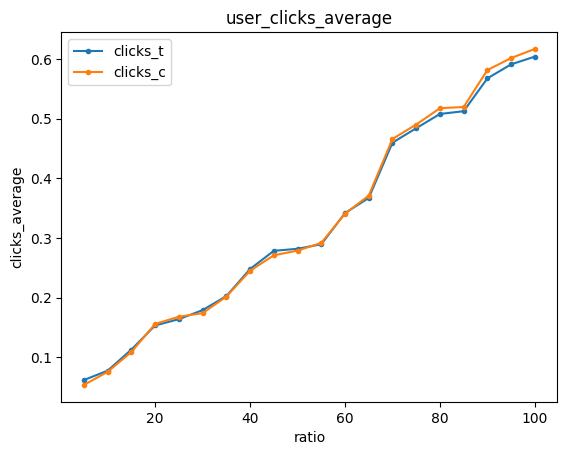

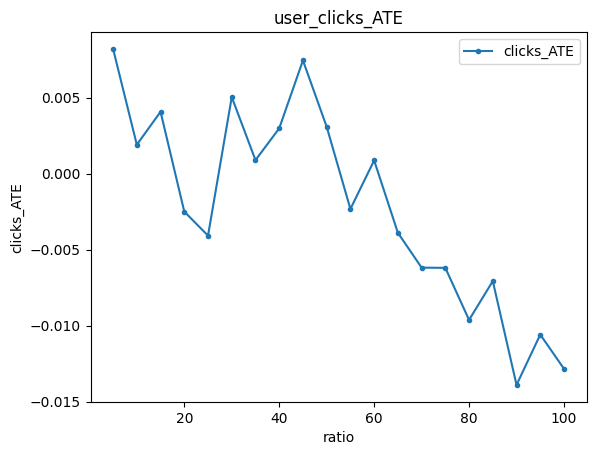

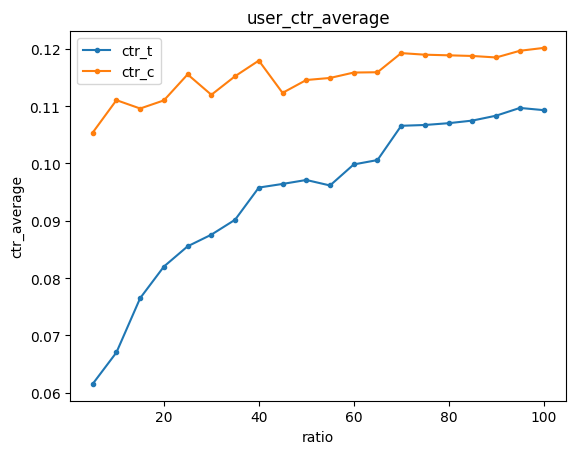

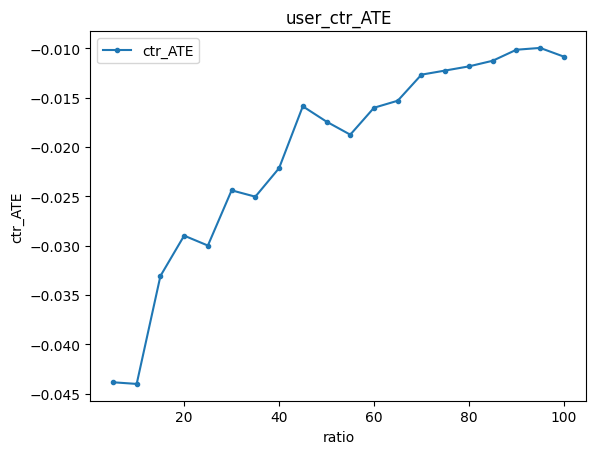

In [20]:
# 3. user 侧画图分析
data1=data1.sort_values(by="ratio")
print(data1)
# (1)impression
data1.plot.line(x="ratio",y=["impression_t","impression_c"],marker=".")
plt.xlabel("ratio")
plt.ylabel("impression_average")
plt.title("user_impression_average")
plt.savefig("user_impression_average.png")
plt.show()
# impression ATE
data1.plot.line(x="ratio",y="impression_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("impression_ATE")
plt.title("user_impression_ATE")
plt.savefig("user_impression_ATE.png")
plt.show()
# (2)clicks
data1.plot.line(x="ratio",y=["clicks_t","clicks_c"],marker=".")
plt.xlabel("ratio")
plt.ylabel("clicks_average")
plt.title("user_clicks_average")
plt.savefig("user_clicks_average.png")
plt.show()
#ATE
data1.plot.line(x="ratio",y="clicks_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("clicks_ATE")
plt.title("user_clicks_ATE")
plt.savefig("user_clicks_ATE.png")
plt.show()
# 3. 点击率ctr
data1.plot.line(x="ratio",y=["ctr_t","ctr_c"],marker=".")
plt.xlabel("ratio")
plt.ylabel("ctr_average")
plt.title("user_ctr_average")
plt.savefig("user_ctr_average.png")
plt.show()
# ATE
data1.plot.line(x="ratio",y="ctr_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("ctr_ATE")
plt.title("user_ctr_ATE")
plt.savefig("user_ctr_ATE.png")
plt.show()

In [37]:
#
feed_data= pd.read_excel("feed.xls")
user_data= pd.read_excel("user.xls")
# print(feed_data)

# 计算feed侧relative——ATE
for i in range(20):
    feed_data.loc[i,"impression_relative_ATE"]= (feed_data.loc[i,"impression_ATE"]/feed_data.loc[19,"impression_ATE"])
for i in range(20):
    feed_data.loc[i,"clicks_relative_ATE"]= (feed_data.loc[i,"clicks_ATE"]/feed_data.loc[19,"clicks_ATE"])
for i in range(20):
    feed_data.loc[i,"ctr_relative_ATE"]= (feed_data.loc[i,"ctr_ATE"]/feed_data.loc[19,"ctr_ATE"])
print(feed_data)
# 计算user侧relative——ATE
for i in range(20):
    user_data.loc[i,"impression_relative_ATE"]= (user_data.loc[i,"impression_ATE"]/user_data.loc[19,"impression_ATE"])
for i in range(20):
    user_data.loc[i,"clicks_relative_ATE"]= (user_data.loc[i,"clicks_ATE"]/user_data.loc[19,"clicks_ATE"])
for i in range(20):
    user_data.loc[i,"ctr_relative_ATE"]= (user_data.loc[i,"ctr_ATE"]/user_data.loc[19,"ctr_ATE"])



   Unnamed: 0  ratio  impression_t  impression_c  impression_ATE  \
0          5%      5    265.947368    134.842105      131.105263   
1         10%     10    305.789474    180.105263      125.684211   
2         15%     15    389.578947    262.228070      127.350877   
3         20%     20    486.584416    365.376623      121.207792   
4         25%     25    499.572917    379.104167      120.468750   
5         30%     30    534.052174    405.973913      128.078261   
6         35%     35    587.261194    457.641791      129.619403   
7         40%     40    672.883117    539.967532      132.915584   
8         45%     45    751.445087    627.930636      123.514451   
9         50%     50    756.187500    634.083333      122.104167   
10        55%     55    784.962085    662.123223      122.838863   
11        60%     60    889.147186    764.194805      124.952381   
12        65%     65    949.132000    832.440000      116.692000   
13        70%     70   1122.572491   1016.743494

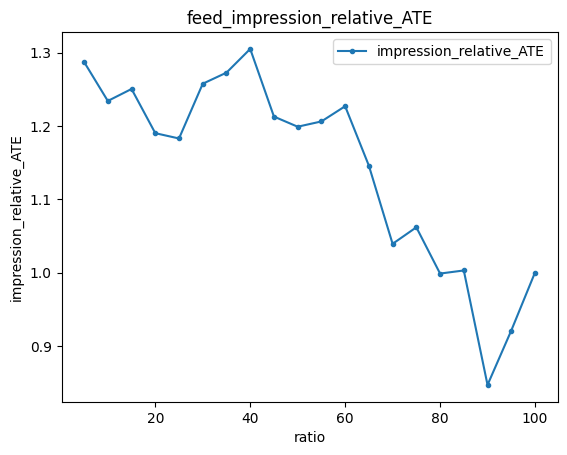

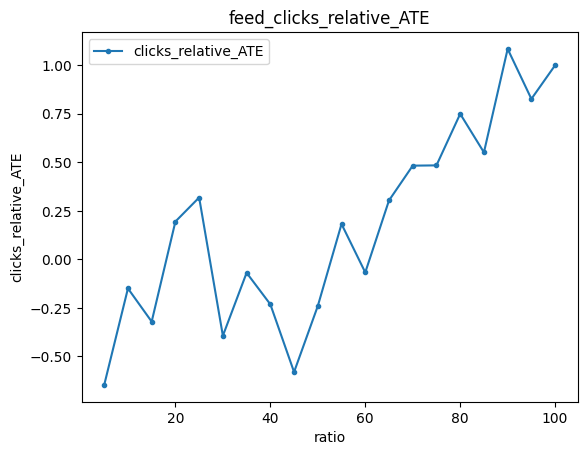

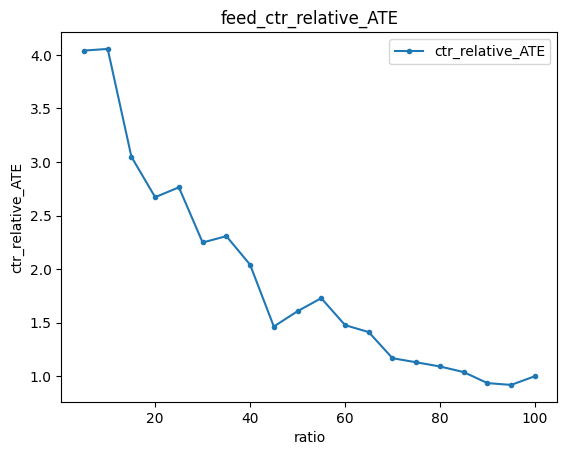

In [38]:
# 画图
## feed侧
# impression relative ATE
feed_data.plot.line(x="ratio",y="impression_relative_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("impression_relative_ATE")
plt.title("feed_impression_relative_ATE")
plt.savefig("feed_impression_relative_ATE.png")
plt.show()
# clicks
feed_data.plot.line(x="ratio",y="clicks_relative_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("clicks_relative_ATE")
plt.title("feed_clicks_relative_ATE")
plt.savefig("feed_clicks_relative_ATE.png")
plt.show()
# ctr
feed_data.plot.line(x="ratio",y="ctr_relative_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("ctr_relative_ATE")
plt.title("feed_ctr_relative_ATE")
plt.savefig("feed_ctr_relative_ATE.png")
plt.show()


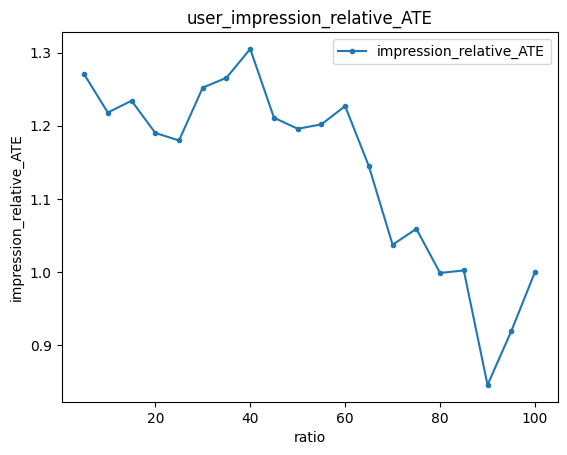

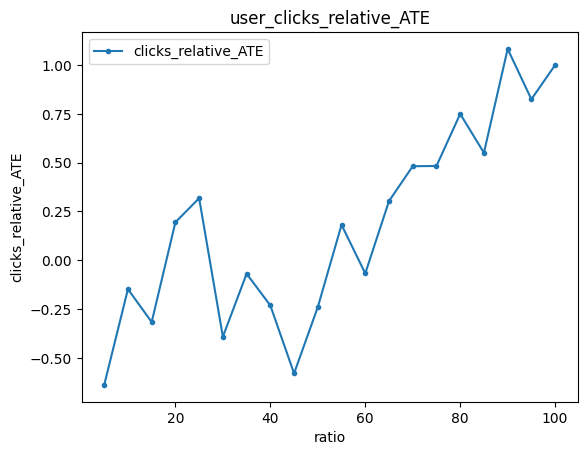

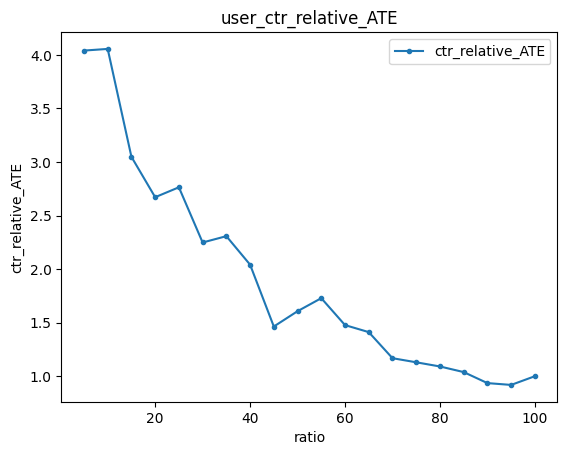

In [39]:
## user侧
# impression relative ATE
user_data.plot.line(x="ratio",y="impression_relative_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("impression_relative_ATE")
plt.title("user_impression_relative_ATE")
plt.savefig("user_impression_relative_ATE.png")
plt.show()
# clicks
user_data.plot.line(x="ratio",y="clicks_relative_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("clicks_relative_ATE")
plt.title("user_clicks_relative_ATE")
plt.savefig("user_clicks_relative_ATE.png")
plt.show()
# ctr
user_data.plot.line(x="ratio",y="ctr_relative_ATE",marker=".")
plt.xlabel("ratio")
plt.ylabel("ctr_relative_ATE")
plt.title("user_ctr_relative_ATE")
plt.savefig("user_ctr_relative_ATE.png")
plt.show()